# Churn No More

SyriaTel is experiencing a high level of customers churning and would like to find a way to help identify customers that will potentially leave before they do. To help solve this issue, we will use machine learning models to help predict customers that will churn. Being able to identify customers thar will likely churn will be extremely useful in helping with customer retention and give the company an opportunity to reach out and work with customers to help keep them as customers. 

To accomplish this goal we will use historical data from the organization that contains various metrics that we will use to predict whether a customer will churn or not. Some of the data that is included in that dataset, including the length of time the customer had the account, whether the customer has a voicemail plan, the total time and charges for the calls and whether or not the customer has had customer service calls, among other things. 

In [1]:
#to start, import pandas and numpy
import pandas as pd
import numpy as np

In [2]:
#import data using pandas
data = pd.read_csv('Data/telecom-data.csv')

#take an initial look at our data
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
data['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

Looking at the dataset, we have the rows of different accounts containing the variable churn, which we will be our target variable. The other columns will be our independent variables. Account length is the number of months that the account has been active. Area code is a code, splitting the country into 3 regions. Voice mail plan is whether the customer has a voicemail plan and number of vmail messages is how many voicemail messages the customer received. Total day/eve/night/intl minute/calls/charges are how many minutes calls and the charge in dollars respectively for the different times of the day or if it was an international call. Customer service calls is how many times the customer called customer service. 

There is also state and phone number which we will drop as these should both be arbitrary.


# Clean Data

Lets start by working cleaning our data so that it can be used in our training models.

In [4]:
#lets start by dropping phone number and the state
df = data.drop(columns=['phone number', 'state'], axis=1)
df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

We need to conver all of our data to numerical values, either int or floats. There are also a few categorical values, such as area code that will need to be converted to dummy columns.

In [7]:
#convert yes, no to 1, 0 respectfully so that they can be used in our models.

yeahno = {'no':0, 'yes':1}
df['international plan'] = df['international plan'].map(yeahno)
df['voice mail plan'] = df['voice mail plan'].map(yeahno)

#convert churn from bools to 0s and 1s
df['churn'] = df['churn'].astype(int)
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


Let's also take a look at our data with a heatmap, to see the correlation between our values. 

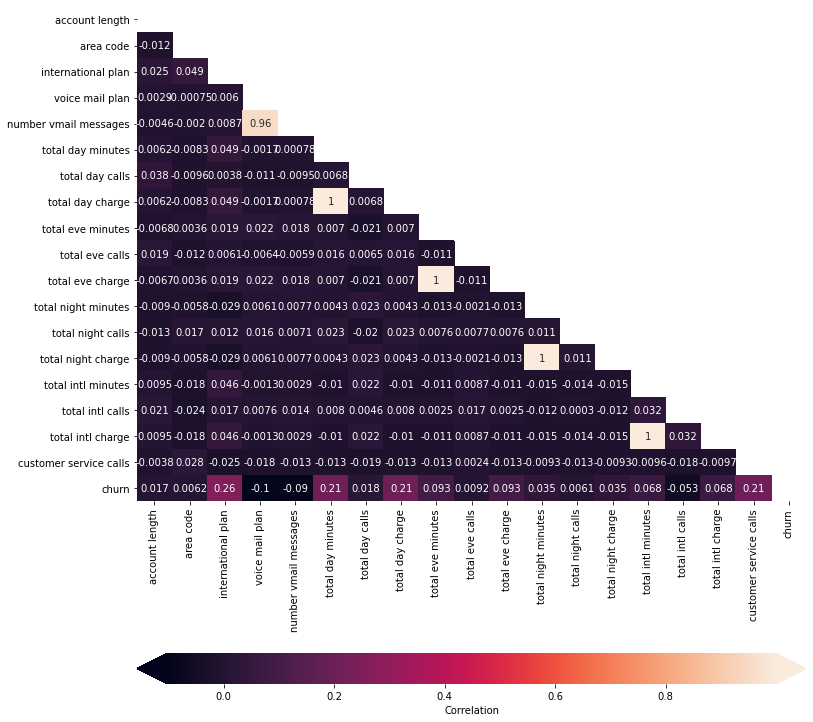

In [8]:
#import needed libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#create a heatmap to see the correlation between our variables.
heatmap_data = df
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 14))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

Looking at the heatmap we can see that there are a few columns that are perfectly correlated, time of day charges and total minutes for that time of day. Looking itno it we will probably find a rate per minute, for the diffrent times of day.

In [9]:
#lookign deeper into our models we can find that there are fixed charges per minute and the costs are fully correlated
df_temp = pd.DataFrame(df.churn)
df_temp['day cost per minute'] = round(df['total day charge'] / df['total day minutes'], 3)
df_temp['eve cost per minute'] = round(df['total eve charge'] / df['total eve minutes'], 3)
df_temp['night cost per minute'] = round(df['total night charge'] / df['total night minutes'], 3)
df_temp['intl cost per minute'] = round(df['total intl charge'] / df['total intl minutes'], 3)
df_temp = df_temp.drop(columns = ['churn'], axis=1)
df_temp.head()

,day cost per minute,eve cost per minute,night cost per minute,intl cost per minute
0,0.17,0.085,0.045,0.27
1,0.17,0.085,0.045,0.27
2,0.17,0.085,0.045,0.27
3,0.17,0.085,0.045,0.27
4,0.17,0.085,0.045,0.27


In [10]:
#take a look at the distribution of our cost per minute
df_temp.describe()

,day cost per minute,eve cost per minute,night cost per minute,intl cost per minute
count,3331.000000,3.332000e+03,3333.000,3315.000000
mean,0.170000,8.500000e-02,0.045,0.270052
std,0.000025,2.775974e-17,0.000,0.000324
min,0.169000,8.500000e-02,0.045,0.268000
25%,0.170000,8.500000e-02,0.045,0.270000
50%,0.170000,8.500000e-02,0.045,0.270000
75%,0.170000,8.500000e-02,0.045,0.270000
max,0.171000,8.500000e-02,0.045,0.273000


From our cost per minute calculations we can see that the call and cost per minute are dependent on one another. Because of this we should drop one or the other columns. For this project we will be dropping all the total charges, as we will build a total bill to see the total cost customers were paying and if potentially a higher bill would lead to a higher churn rate and will keep the total minutes as their own columns.

In [11]:
#make a new column for the total cost of all charges. 
df['total cost'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total cost
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,60.10
3329,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,63.53
3330,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,67.74
3331,184,510,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0,57.53


In [12]:
#remove individual charges and voicemail plan
df =df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'voice mail plan'], axis=1)
df

,account length,area code,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total cost
0,128,415,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,75.56
1,107,415,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,59.24
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,62.29
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,66.80
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,60.10
3329,68,415,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,63.53
3330,28,510,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,67.74
3331,184,510,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,57.53


In [13]:
#check area code
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

It looks like there are only three area codes. Because of this, it would probably be best to convert them into categorical, dummy variables. 

In [14]:
#convert area code to categorical dummies
df1 = pd.get_dummies(df['area code'], prefix='area code', drop_first=True)
df1

,area code_415,area code_510
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
3328,1,0
3329,1,0
3330,0,1
3331,0,1


In [15]:
#combine the dummies and the base dataframe
df = pd.concat([df, df1], axis=1)
df

,account length,area code,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total cost,area code_415,area code_510
0,128,415,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,75.56,1,0
1,107,415,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,59.24,1,0
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,62.29,1,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,66.80,0,0
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,52.09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,0,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,60.10,1,0
3329,68,415,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,63.53,1,0
3330,28,510,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,67.74,0,1
3331,184,510,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,57.53,0,1


In [16]:
#drop area code from the dataframe as it has been split into categorical columns above.
df = df.drop('area code', axis=1)
df

,account length,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,total cost,area code_415,area code_510
0,128,0,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,75.56,1,0
1,107,0,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,59.24,1,0
2,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,62.29,1,0
3,84,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,66.80,0,0
4,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,52.09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,36,156.2,77,215.5,126,279.1,83,9.9,6,2,0,60.10,1,0
3329,68,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0,63.53,1,0
3330,28,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0,67.74,0,1
3331,184,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0,57.53,0,1


In [17]:
#check to make sure that we are not missing any values and all our dtpyes are in usable format (should be int or float).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total night minutes     3333 non-null   float64
 8   total night calls       3333 non-null   int64  
 9   total intl minutes      3333 non-null   float64
 10  total intl calls        3333 non-null   int64  
 11  customer service calls  3333 non-null   int64  
 12  churn                   3333 non-null   int32  
 13  total cost              3333 non-null   float64
 14  area code_415           3333 non-null   

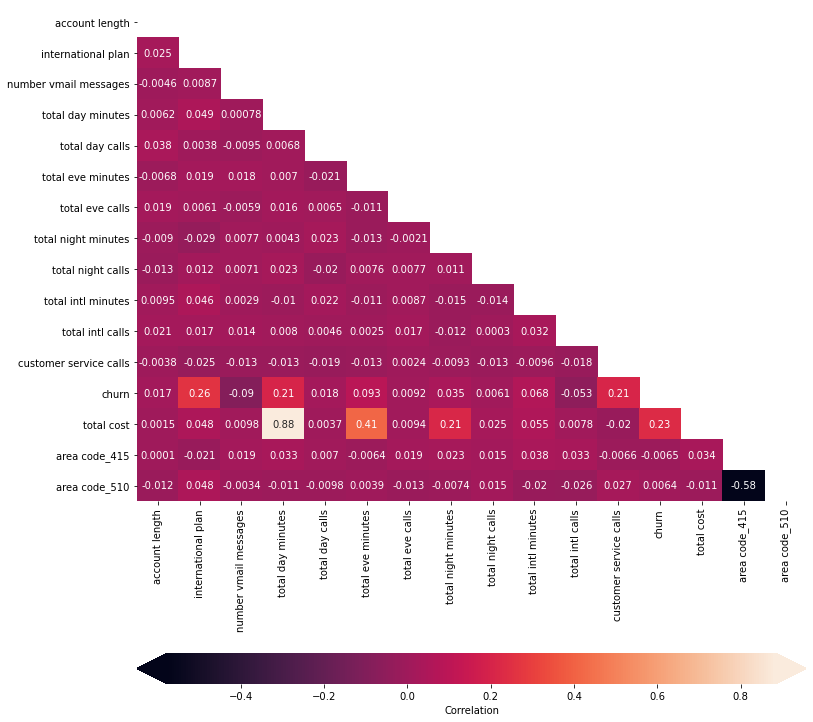

In [18]:
heatmap_data = df
corr = heatmap_data.corr()

fig, ax = plt.subplots(figsize=(12, 14))

sns.heatmap(data=corr, 
            mask=np.triu(np.ones_like(corr, dtype=bool)), 
            ax=ax, 
            annot=True, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

So the column we made for total cost has a very high correlation with total total day minutes. There is also a very high correlation 

The data should now be ready for modeling. The categorical variables have been converted using dummies, all variables that should be closely correlated should have been delt with.  

# The Cost of Customers Leaving

Before we build our first model, we should take a look at what is at stake from the business. 

In [19]:
loss = df.loc[df['churn'] == 1]
keep = df.loc[df['churn'] == 0]
print('Total Revenue:          $', df['total cost'].sum())
print('Total Loss:             $', loss['total cost'].sum())
print('% of revenue loss:       ', round(loss['total cost'].sum() / df['total cost'].sum() * 100, 2))
print('Mean Loss per customer: $', round(loss['total cost'].mean(),2))

Total Revenue:          $ 198146.03
Total Loss:             $ 31566.93
% of revenue loss:        15.93
Mean Loss per customer: $ 65.36


The company has a monthly revenue of 198,146 and is seeing a loss in revenue of 31,567 from the customers that churn. This is a loss in revenue of nearly 16%, which is a substantial loss. The average customer that is leaving is taking 65.36 in revenue. This is also important to consider when looking for a solution in customer retention, as it would not be fiscally reasonable to spend more than that per customer retained. 

# Building our First Model

Let's start by building a simple, linear regression model to get a baseline model and see how we can improve on it.

In [20]:
#tkae a look at the distribution of churn 
df.churn.value_counts()

0    2850
1     483
Name: churn, dtype: int64

Churn is not eavenly split. There are far fewer customers that hav churned than those that have stayed with the company.

In [21]:
#Check the frequency of the churn, our dependant variable
df.churn.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

Above we can see that the retention rate (those that did not churn) is 85.5%. Because of this we can expect that through just by selecting nobody churning, we would get an accuracy of 85.5%

In [22]:
#import train test split module
from sklearn.model_selection import train_test_split

#seperate the independant variables from our dependant variables
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size=0.25)

In [23]:
print(y_train.value_counts())
print(y_test.value_counts())

0    2136
1     363
Name: churn, dtype: int64
0    714
1    120
Name: churn, dtype: int64


In [24]:
X_train.head()

,account length,international plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,total cost,area code_415,area code_510
2329,137,0,0,104.7,115,249.8,144,192.3,99,8.9,2,1,50.08,1,0
1347,111,0,0,224.9,117,191.9,127,229.9,97,10.3,3,0,67.67,0,0
2994,128,0,0,227.9,130,302.6,71,191.5,82,5.5,7,1,74.57,0,0
1412,131,0,24,135.9,60,233.2,78,210.6,121,9.4,4,1,54.94,1,0
96,73,0,0,160.1,110,213.3,72,174.1,72,13.0,4,0,56.69,1,0


We can see that our data is on varying scales and should be standardized before we run our model, to prevent some variables to be weighted more than others.

In [25]:
# import needed functions
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

#set a standard scaler
scaler = StandardScaler()

#fit and transform to scale our independant variables
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#set logistical regression for first model
logreg = LogisticRegression(fit_intercept=False, C=1e15, solver='liblinear')
logreg.fit(X_train, y_train)

#make predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [27]:
#check to make see that we did not get a bad sampling, where we have a lower or higher ratio of the dependant variable.
train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals).value_counts())
print(pd.Series(train_residuals).value_counts(normalize=True))

0    2144
1     355
Name: churn, dtype: int64
0    0.857943
1    0.142057
Name: churn, dtype: float64


In [28]:
test_residuals = np.abs(y_test - y_hat_test)
print(pd.Series(test_residuals).value_counts())
print(pd.Series(test_residuals).value_counts(normalize=True))

0    712
1    122
Name: churn, dtype: int64
0    0.853717
1    0.146283
Name: churn, dtype: float64


Overall the split is pretty even and represenative of the dataset.

In [29]:
#import more functions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


In [30]:
#import confusion matrix
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_hat_test)

Precision is a measure of the accuracy of predicted positives. In out tree, we can see that we have a precision of 47.1%.

Recall is a measure of the correctly predicted true positives. We got a recall rate of 13.3%.

Accuracy is total number of correctly predicted true positives and true negatives. Above we have 85.4%.

F1 score is a combination of precision and recall scores. Above we have a score of 20.8%.

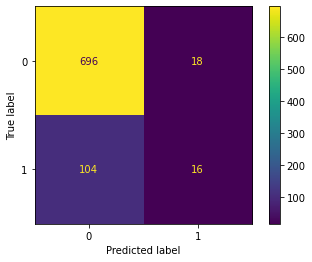

In [31]:
#import to display confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay

matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
matrix.plot();

In [32]:
#Create a function to return scores, a cross validation score, and a confusion matrix for models
def print_metrics(y_test, y_pred, model):
    
    #return scores for the model
    print("Precision Score: {:.4}".format(precision_score(y_test, y_pred)))
    print("Recall Score:    {:.4}".format(recall_score(y_test, y_pred)))
    print("Accuracy Score:  {:.4}".format(accuracy_score(y_test, y_pred)))
    print("F1 Score:        {:.4}".format(f1_score(y_test, y_pred)))
    
    # cross validation score
    cv_score = cross_val_score(model, X_test_scaled, y_test, cv=5)
    mean_dt_cv_score = np.mean(cv_score)

    print("Mean Cross Validation Score: {:.4}".format(mean_dt_cv_score))
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
    matrix.plot();

Precision Score: 0.4706
Recall Score:    0.1333
Accuracy Score:  0.8537
F1 Score:        0.2078
Mean Cross Validation Score: 0.6547


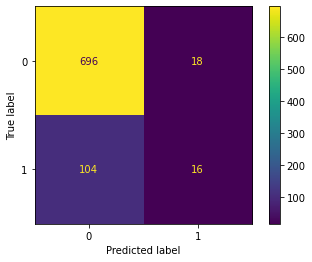

In [33]:
print_metrics(y_test, y_hat_test, logreg)

Above we can see the measure of true negatives (correctly predicted customers that do not churn) in the top left corner, the top right is the false positives (incorrectly predicted as true, while being false), the bottom right is false negatives (customers that churn but were not predicted to), and in the bottom right is true positives (correctly predicted customers that churn). 

From our first model it looks like we are getting many (104) false negatives (type 2 errors). We also got a few false positive errors at 18 (type 1 errors). This is not a bad start, however we are missing many of our predicted values, and thus we should be able to imporve on our model. 

To proceed we can start by trying to change the scope of our model, so that the model can predict more of our positive values. 

# Build a First Tree

Decision trees can be a very helpful in building a model. Decision trees essentially take the independent variables and break the variables into groups (called leaf’s). It can do this on multiple levels (nodes) until you have an predictive result based on the inputs it received. It uses the training data to help it understand the results it is looking for.  

Let's start by making an initial tree to see if it improves on our base model.

In [34]:
#import Decision Tree Classifier, and initiate it.
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#define and fit the decision tree
classifier = DecisionTreeClassifier(random_state=11)
classifier.fit(X_train_scaled, y_train)

#make prediction with our decision tree
y_pred = classifier.predict(X_test_scaled)

We can see that our first tree has been a major improvment in accuracy from the linear regression model. We have a large increase in true positives and are now predicting most of the positives correctly. 

Precision Score: 0.7846
Recall Score:    0.85
Accuracy Score:  0.9448
F1 Score:        0.816
Mean Cross Validation Score: 0.9616


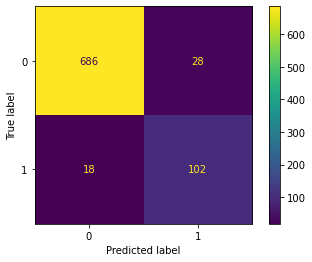

In [35]:
print_metrics(y_test, y_pred, classifier)

Overall this decision tree performed much better than the linear regression model, but still has room for improvment. 

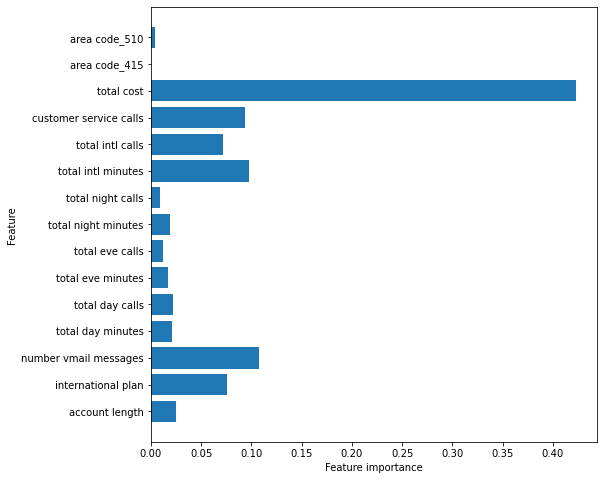

In [36]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(classifier)

We have already seen a huge improvment in our model with a base decision tree, we saw a huge decrease in false negatives and a large increase in true positives.
There was a slight increase in false positives as well as a slight decrease in in true negatives. However, overall with the baseline decision tree, we have built a far more accurate and better performing model. 

We can build on this by optamizing trees with diffrent metrics and building a random forest to build on our model even further.


## Optimize the Tree

We can improve our tree from the base decision tree model. To improve our model, first find where diffrent variables perform the best.

In [37]:
from sklearn.metrics import r2_score, mean_squared_error

def performance(y_true, y_predict):
    """ 
    Calculates and returns the two performance scores between 
    true and predicted values - first R-Squared, then RMSE
    """

    # Calculate the r2 score between 'y_true' and 'y_predict'
    r2 = r2_score(y_true, y_predict)
    # Calculate the root mean squared error between 'y_true' and 'y_predict'
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    # Return the score

    return [r2, rmse]


score = performance(y_test, y_pred)
score

[0.5522408963585435, 0.23485288011808625]

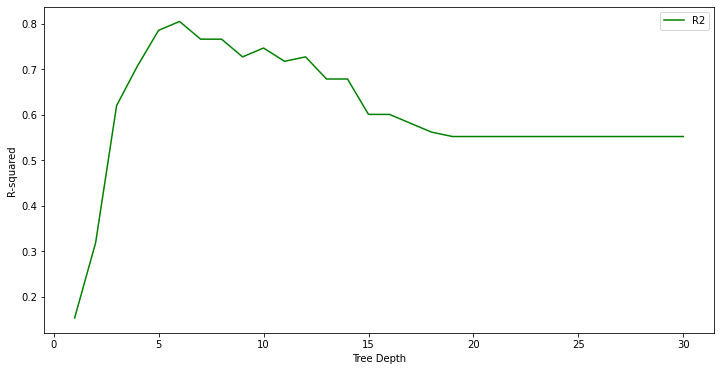

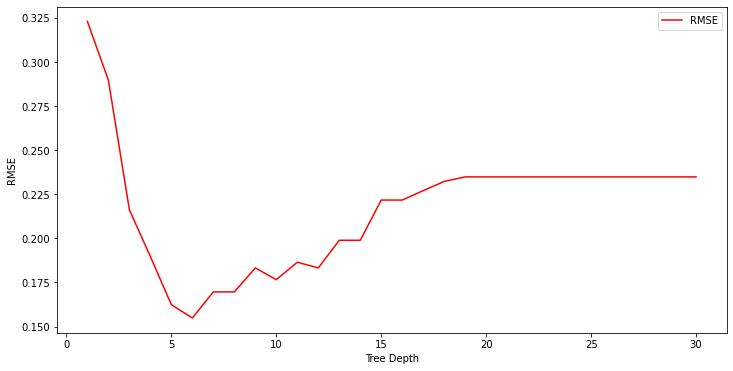

In [38]:
max_depths = list(range(1,31))
rmse_results = []
r2d2 = []

for depth in max_depths:
    classifier = DecisionTreeClassifier(max_depth=depth, random_state=11)
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    
    r2d2.append(score[0])
    rmse_results.append(score[1])
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, r2d2, 'green', label='R2')
plt.xlabel('Tree Depth')
plt.ylabel('R-squared')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(max_depths, rmse_results, 'red', label='RMSE')
plt.xlabel('Tree Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Precision Score: 0.9808
Recall Score:    0.85
Accuracy Score:  0.976
F1 Score:        0.9107
Mean Cross Validation Score: 0.9712


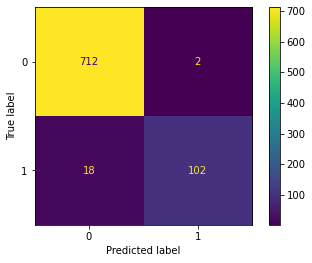

In [39]:
#define and fit the decision tree
classifier = DecisionTreeClassifier(random_state=11, max_depth=6)
classifier.fit(X_train_scaled, y_train)

#make prediction with our decision tree
y_pred = classifier.predict(X_test_scaled)

print_metrics(y_test, y_pred, classifier)

Just by finding the optimal depth for the decsion tree, we were able to improve our model slighlty an remove most of the false positives.

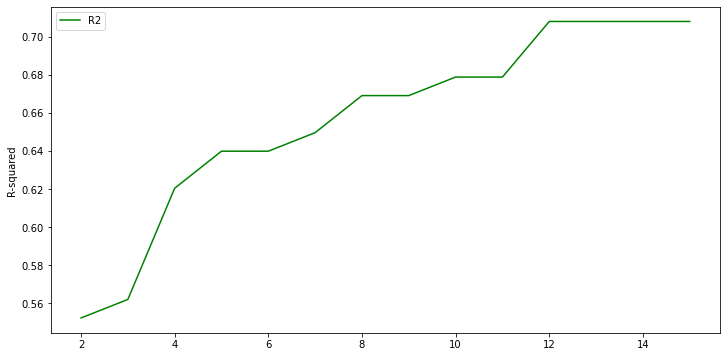

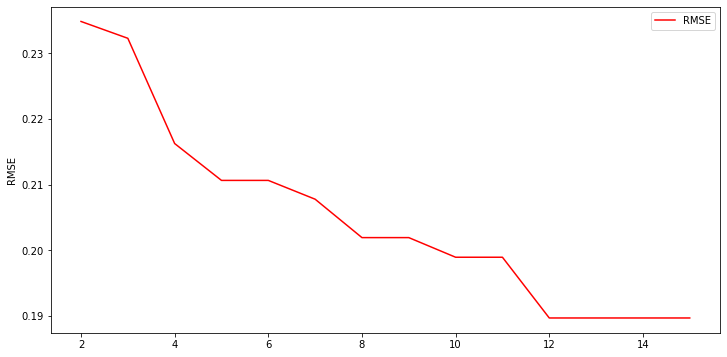

In [40]:
min_samples_split = list(range(2,16))
rmse_results = []
r2d2 = []

for sample in min_samples_split:
    classifier = DecisionTreeClassifier(min_samples_split=sample, random_state=11)
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    
    r2d2.append(score[0])
    rmse_results.append(score[1])
    
plt.figure(figsize=(12,6))
plt.plot(min_samples_split, r2d2, 'green', label='R2')
plt.ylabel('R-squared')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(min_samples_split, rmse_results, 'red', label='RMSE')
plt.ylabel('RMSE')
plt.legend()
plt.show()


Precision Score: 0.9902
Recall Score:    0.8417
Accuracy Score:  0.976
F1 Score:        0.9099
Mean Cross Validation Score: 0.9724


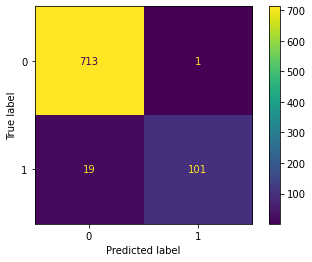

In [41]:
#define and fit the decision tree
classifier = DecisionTreeClassifier(random_state=11, max_depth=6, min_samples_split=12)
classifier.fit(X_train_scaled, y_train)

#make prediction with our decision tree
y_pred = classifier.predict(X_test_scaled)

print_metrics(y_test, y_pred, classifier)

Again we saw a slight improvment by finding the ideal min samples split for the tree. 

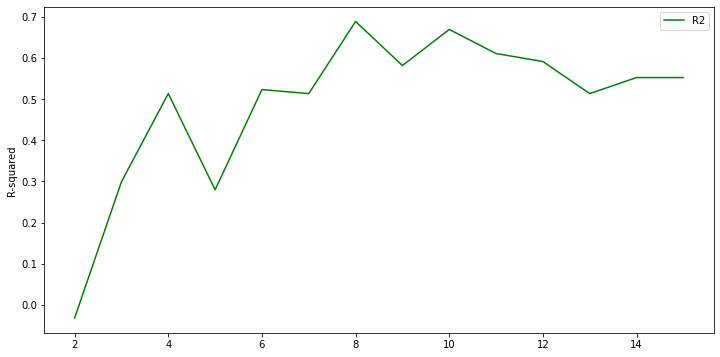

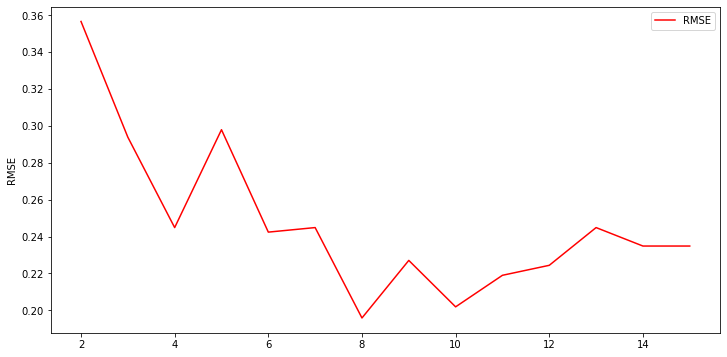

In [42]:
max_features = list(range(2,16))
rmse_results = []
r2d2 = []

for sample in max_features:
    classifier = DecisionTreeClassifier(max_features=sample, random_state=11)
    classifier.fit(X_train_scaled, y_train)
    y_pred = classifier.predict(X_test_scaled)
    score = performance(y_test, y_pred)
    
    r2d2.append(score[0])
    rmse_results.append(score[1])
    
plt.figure(figsize=(12,6))
plt.plot(max_features, r2d2, 'green', label='R2')
plt.ylabel('R-squared')
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(max_features, rmse_results, 'red', label='RMSE')
plt.ylabel('RMSE')
plt.legend()
plt.show()

Precision Score: 0.934
Recall Score:    0.825
Accuracy Score:  0.9664
F1 Score:        0.8761
Mean Cross Validation Score: 0.9473


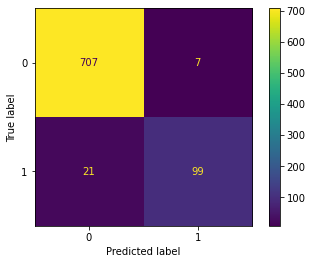

In [43]:
#define and fit the decision tree
classifier = DecisionTreeClassifier(random_state=11, max_depth=6, min_samples_split=12, max_features=8)
classifier.fit(X_train_scaled, y_train)

#make prediction with our decision tree
y_pred = classifier.predict(X_test_scaled)

print_metrics(y_test, y_pred, classifier)

Ok now with limiting the features, in combination with the minsampels split and the max depth we got above, we actually reduced the performance of our model. This is likely due to overfitting our training data, but we have found a pretty good model with the decision tree limiting the max depth of the tree to 6 and setting the minimum number of samples at each split to be 12. 

# K Nearest Neighbor!

Another tactic to build a machine learning model is using the nearest neighbor regression which groups variables to closely related values to predict whether a customer will churn using a clustering technique.

In [44]:
#import neighbors
from sklearn.neighbors import KNeighborsClassifier

#set neighbor classifier 
clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)
preds = clf.predict(X_test_scaled)

So a base nearest neighbor model out performed our base model, but was not at succesful as our decision trees. The low recall score shows that it is not to effective at predicting churning customers. 

We can continue to improve the model by finding the best metrics to base the model on. 

In [45]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    # Your code here
    best_k = 0
    best_score = 0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        
        
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
            
    print('best value for k: {}'.format(best_k))
    print('F1-Score: {}'.format(best_score))

In [46]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

best value for k: 3
F1-Score: 0.5


Precision Score: 0.8696
Recall Score:    0.3333
Accuracy Score:  0.8969
F1 Score:        0.4819
Mean Cross Validation Score: 0.8765


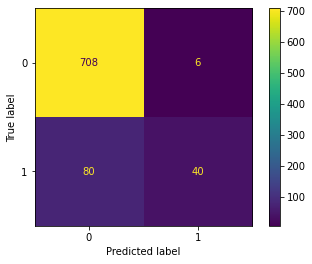

In [47]:
print_metrics(y_test, preds, clf)

A slight improvement, but not much.

In [48]:
#change the parameters to see if the model imporves
model = KNeighborsClassifier(n_neighbors=3, leaf_size=20)
model.fit(X_train_scaled, y_train)
preds2 = model.predict(X_test_scaled)

Precision Score: 0.7188
Recall Score:    0.3833
Accuracy Score:  0.8897
F1 Score:        0.5
Mean Cross Validation Score: 0.8825


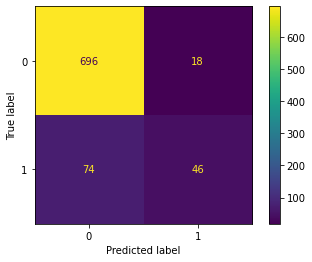

In [49]:
print_metrics(y_test, preds2, model)

Overall neighbors did not perform any better than the decision trees. It is still important to see how it performed and can potentially be used inu upcoming piping and ensemble methods.

# Pipes

Piping can be an effective method to build a model efficiently, and set up a grid search to iterate through varying parameters to find the best model for our data. 

In [50]:
#import needed functions for piping
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [51]:
#setup same as neighbors
clf = KNeighborsClassifier()
clf.fit(X_train_scaled, y_train)
preds3 = clf.predict(X_test_scaled)

In [52]:
#setup inital pipeline with standard scaler and KNeighbor classifier
scaled_pipes1 = Pipeline([('ss', StandardScaler()), ('knn', KNeighborsClassifier())])

Precision Score: 0.8696
Recall Score:    0.3333
Accuracy Score:  0.8969
F1 Score:        0.4819
Mean Cross Validation Score: 0.8777


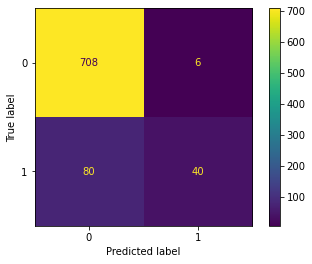

In [53]:
#run a pipeline with neighbor and standard scaler
scaled_pipes1.fit(X_train_scaled, y_train)
preds4 = scaled_pipes1.predict(X_test_scaled)
print_metrics(y_test, preds4, scaled_pipes1)

In [54]:
#setup pipeline with standard scaler and random forest
scaled_pipes2 = Pipeline([('ss', StandardScaler()), ('RF', RandomForestClassifier(random_state=11))])

In [55]:
#define a grid of parameters to build a better model
grid = [{'RF__max_depth': [4, 5, 6], 
         'RF__min_samples_split': [2, 5, 10], 
         'RF__min_samples_leaf': [1, 3, 5]}]

In [56]:
#run a gridsearch with the above grid 
gridsearch = GridSearchCV(estimator=scaled_pipes2, param_grid=grid, scoring='accuracy', cv=5)

Precision Score: 0.9747
Recall Score:    0.6417
Accuracy Score:  0.946
F1 Score:        0.7739
Mean Cross Validation Score: 0.9509


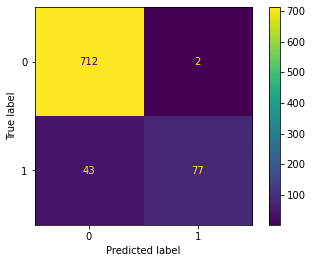

In [57]:
gridsearch.fit(X_train, y_train)

preds5 = gridsearch.predict(X_test)
print_metrics(y_test, preds5, gridsearch)

The piping model worked better than the baseline model, but underpreformed relative to the decission trees. It missed a third of all of our positive values, meaning we are missing a large number of churning customers. 

# Ensembles

Next, we will build an ensemble method which is combining multiple methods to build a model.

Bagging is the first ensemble method that we will use. Bagging is a method of training multiple models independently with diffrent samples of the dataset. 

In [58]:
#import bagging classifier
from sklearn.ensemble import BaggingClassifier

In [59]:
#build and fit the decision tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10)
tree_clf.fit(X_train, y_train)
gridsearch.fit(X_train, y_train)

pred_tree = tree_clf.predict(X_test)

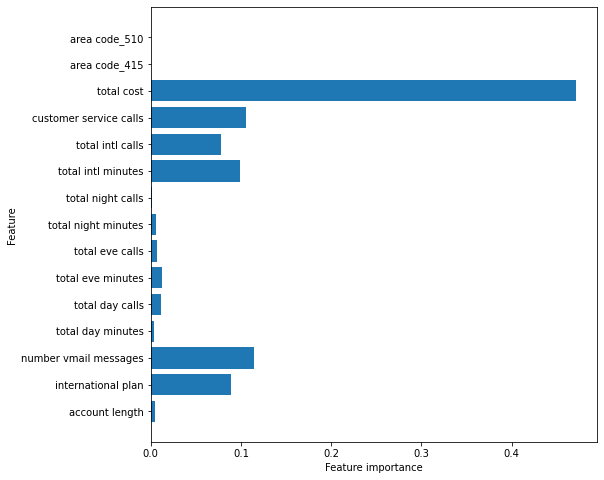

In [60]:
# look at best features
plot_feature_importances(tree_clf)

Precision Score: 0.9358
Recall Score:    0.85
Accuracy Score:  0.97
F1 Score:        0.8908
Mean Cross Validation Score: 0.9544


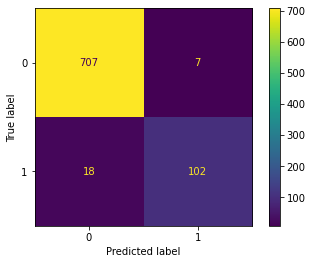

In [61]:
print_metrics(y_test, pred_tree, tree_clf)

Bagging a decision tree has been the best perofrming model thus far. We have seen a large decrease in both false positives and negatives. We have a correct prediction on all true positives of 83.3% and the best scores and performance overall. 

We will continue with a couple more methods to see if we can out perform this, but this is a solid model.

# Bagging Trees

In [62]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=11, min_samples_leaf=7), n_estimators=14)
bagged_tree.fit(X_train, y_train)
pred_bag = bagged_tree.predict(X_test)

Precision Score: 1.0
Recall Score:    0.8583
Accuracy Score:  0.9796
F1 Score:        0.9238
Mean Cross Validation Score: 0.9665


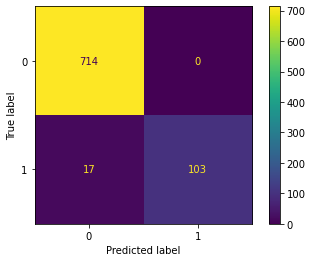

In [63]:
print_metrics(y_test, pred_bag, bagged_tree)

Again we are seeing our best model. we have correctly predicted 86.7% of churning customers, and have also seen a slight reduction in our false positives. Bagging the decision tree has worked out well in improving our model. Next we will take it a step further and work with a random forest.

# Random Forest

Another method is to build a random forest which is a collaboration of decission tree, which we also used above in the pipes model. 

In [64]:
forest = RandomForestClassifier(n_estimators=20, max_depth=5, max_features=10)
forest.fit(X_train, y_train)
pred_forest = forest.predict(X_test)

Precision Score: 0.9903
Recall Score:    0.85
Accuracy Score:  0.9772
F1 Score:        0.9148
Mean Cross Validation Score: 0.9652


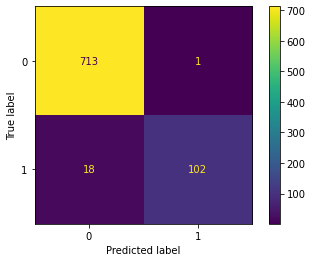

In [65]:
print_metrics(y_test, pred_forest, forest)

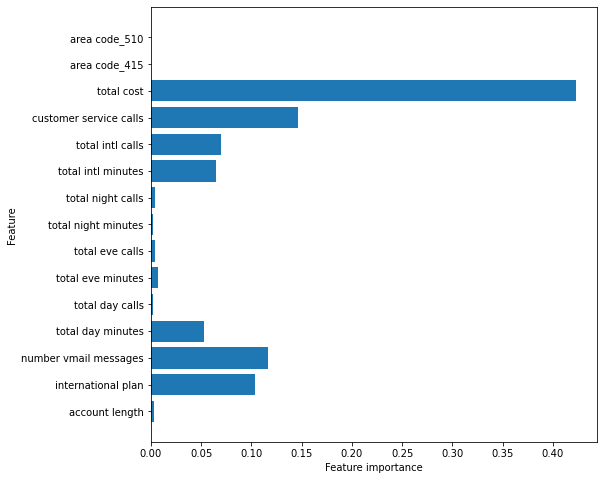

In [66]:
plot_feature_importances(forest)

Overall the random forest did well but was down slightly from our bagged decission tree. Let's see what happens when we try the bagging method with a random forest. 

# Bagging Forests

In [67]:
bagged_tree = BaggingClassifier(RandomForestClassifier(criterion='gini', max_depth=12, random_state=11, min_samples_leaf=2, max_features=10), n_estimators=10)
bagged_tree.fit(X_train_scaled, y_train)
pred_bag = bagged_tree.predict(X_test_scaled)

Precision Score: 0.981
Recall Score:    0.8583
Accuracy Score:  0.9772
F1 Score:        0.9156
Mean Cross Validation Score: 0.9653


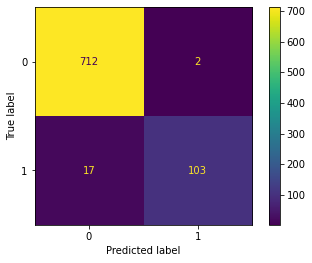

In [68]:
print_metrics(y_test, pred_bag, bagged_tree)

Overall a very similar result to our bagged single tree. We can likley improve on our base random forest model though by finding better performing parameters for the model.

# Grid Search - Random Forest

Grid searching can be a helpful way to iterate through varying paramaters for models to help find which combination of parameters work the best for us. This can be computationaly intense thus is best to set a limited number of parameters.

In [69]:
#create our first set of parameters
param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6] 
}

In [70]:
#set the calssifier and run a gridsearch
rforestC = RandomForestClassifier(random_state=11)

forest_gs = GridSearchCV(rforestC, param_grid, cv=3)
forest_gs.fit(X_train_scaled, y_train)
pred_gs1 = forest_gs.predict(X_test_scaled)

print(f"Training Accuracy: {forest_gs.best_score_ :.2%}")

print(f"Optimal Parameters: {forest_gs.best_params_}")

Training Accuracy: 97.24%
Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 30}


Precision Score: 0.9903
Recall Score:    0.85
Accuracy Score:  0.9772
F1 Score:        0.9148
Mean Cross Validation Score: 0.9461


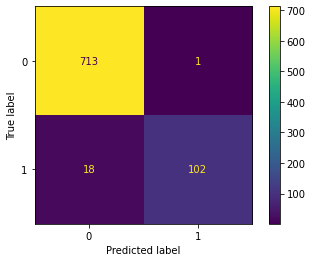

In [71]:
print_metrics(y_test, pred_gs1, forest_gs)

This looks like a good start. Lets try again setting parameters from what we learned in the first grid search and see if we can improve it more. 

In [72]:
#setup another grid of parameters based on the best performers from the first grid search, 
#setting new parameters around waht was predicted.
param_grid2 = {
    'n_estimators': [20, 30, 50, 75],
    'criterion': ['entropy'],
    'max_depth': [None, 20],
    'min_samples_split': [8, 10, 12, 20],
    'min_samples_leaf': [2, 3, 4] 
}

In [73]:
#run another grid search model with the random forest
forest_gs2 = GridSearchCV(rforestC, param_grid2, cv=3)
forest_gs2.fit(X_train_scaled, y_train)
pred_gs2 = forest_gs.predict(X_test_scaled)

print(f"Training Accuracy: {forest_gs2.best_score_ :.2%}")

print(f"Optimal Parameters: {forest_gs2.best_params_}")

Training Accuracy: 97.56%
Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 30}


Precision Score: 0.9903
Recall Score:    0.85
Accuracy Score:  0.9772
F1 Score:        0.9148
Mean Cross Validation Score: 0.9461


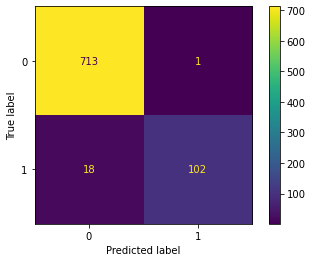

In [74]:
print_metrics(y_test, pred_gs2, forest_gs2)

Overall a slight improvment, but it looks like we might be able to get it slighlty higher with a couple of the parameters.

In [75]:
#build one last grid, again trying to narrow down what works best.
param_grid3 = {
    'n_estimators': [25, 30, 33, 35, 38, 40],
    'criterion': ['entropy'],
    'max_depth': [None, 20, 30],
    'min_samples_split': [9],
    'min_samples_leaf': [2] 
}

In [76]:
#build one more model.
forest_gs3 = GridSearchCV(rforestC, param_grid3, cv=3)
forest_gs3.fit(X_train_scaled, y_train)
pred_gs3 = forest_gs3.predict(X_test_scaled)

print(f"Training Accuracy: {forest_gs3.best_score_ :.2%}")

print(f"Optimal Parameters: {forest_gs3.best_params_}")

Training Accuracy: 97.60%
Optimal Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 33}


In [77]:
forest_gs3.score(X_train_scaled, y_train)

0.9795918367346939

In [78]:
forest_gs3.score(X_test_scaled, y_test)

0.9760191846522782

Precision Score: 0.9902
Recall Score:    0.8417
Accuracy Score:  0.976
F1 Score:        0.9099
Mean Cross Validation Score: 0.9533


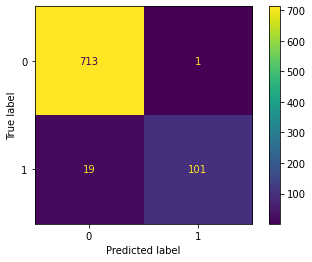

In [79]:
print_metrics(y_test, pred_gs3, forest_gs3)

Looking at the scores from the train and test data, we can see that we have not yet overfit our model, and it has done well on both the train and test data. 

This is a decent model, but still did not outdo our earlier bagging model. It also didn't help in narrowing down the parameters. 

# Gradient BOOST and Adaboost

Boosting is suing a collaberation of various models to build a an average of a diverse group of models.

Adaboost is a model that learns from its previous model to build a better model. 

Gradient boost uses a weaker starting model then using residuals of all values, it makes improvments to the next model. 

In [80]:
#import adaBoostClassifier and gradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

#setup classifiers
adaboo = AdaBoostClassifier(random_state=11)
gradboo = GradientBoostingClassifier(random_state=11)

#fit models
adaboo.fit(X_train_scaled, y_train)
gradboo.fit(X_train_scaled, y_train)

#predict on our data in ada
pred_train_ada = adaboo.predict(X_train_scaled)
pred_test_ada = adaboo.predict(X_test_scaled)

#predict on our data in gradient
pred_train_grad = gradboo.predict(X_train_scaled)
pred_test_grad = gradboo.predict(X_test_scaled)

In [81]:
#print scores for training data ada
#print_metrics(y_train, pred_train_ada, adaboo)

Precision Score: 0.7848
Recall Score:    0.5167
Accuracy Score:  0.9101
F1 Score:        0.6231
Mean Cross Validation Score: 0.8885


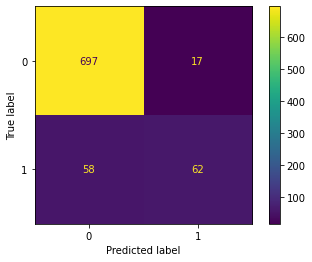

In [82]:
#print scores for testing data ada
print_metrics(y_test, pred_test_ada, adaboo)

Precision Score: 0.9811
Recall Score:    0.8667
Accuracy Score:  0.9784
F1 Score:        0.9204
Mean Cross Validation Score: 0.9772


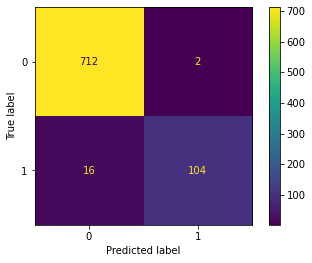

In [83]:
#print scores for testing data gradient
print_metrics(y_test, pred_test_grad, gradboo)

Ada did not do so well, but gradient was one of the better models thus far. 

# XGBoost

One of the most succesful ways to build a model currently is using XGBoost or extreme gradient boosting. It is an independant library that is capable of making highly accurate models. 

In [84]:
#import modules
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [85]:
#set and fit xgb
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_xgb_train = xgb.predict(X_train)
pred_xgb_test = xgb.predict(X_test)

In [86]:
#print xgb scores for training data
#print_metrics(y_train, pred_xgb_train, xgb)

Precision Score: 0.9904
Recall Score:    0.8583
Accuracy Score:  0.9784
F1 Score:        0.9196
Mean Cross Validation Score: 0.9736


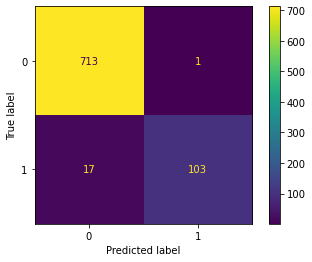

In [87]:
#print xgb scores for test data
print_metrics(y_test, pred_xgb_test, xgb)

Ok, pretty good but we can improve on this with a grid search to find the best parameters. 

In [88]:
#set parameter grid for xgb 
param_grid_xgb = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [2, 4, 6, 8],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.3, 0.5, 0.7],
    'n_estimators': [10, 50, 100],
}

In [89]:
#run grid search for xgb. set scoring to recall, as this is the more important score for what we are looking for.
gridxgb = GridSearchCV(xgb, param_grid_xgb, scoring='recall', cv=None, n_jobs=1)
gridxgb.fit(X_train, y_train)

best_parameters = gridxgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = gridxgb.predict(X_train)
test_preds = gridxgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 2
min_child_weight: 1
n_estimators: 50
subsample: 0.5

Training Accuracy: 97.92%
Validation accuracy: 98.08%


Precision Score: 1.0
Recall Score:    0.8667
Accuracy Score:  0.9808
F1 Score:        0.9286
Mean Cross Validation Score: 0.8


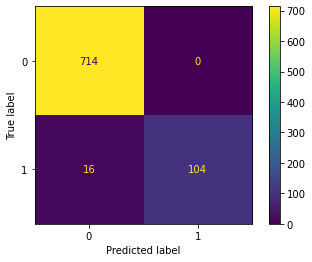

In [90]:
print_metrics(y_test, test_preds, gridxgb)

This has slighlty improved the model into the best we have made yet. We have no false positives and only missing 16 churned customers as false negatives. Overall we match the recall score from our previous best model. However, the cross validation score saw a large decrease in accuracy. Because of this, the model will likely not perform as well as the previous model. 

It is always worth trying to improve slighlty, so lets try running another grid search based on the above best performing parameters. 

In [91]:
param_grid_xgb = {
    'learning_rate': [0.2, 0.25, 0.3],
    'max_depth': [2, 5, 10, 20],
    'min_child_weight': [0.5, 1],
    'subsample': [0.4, 0.5, 0.6, 0.75],
    'n_estimators': [25, 50, 75],
}

In [92]:
gridxgb = GridSearchCV(xgb, param_grid_xgb, scoring='recall', cv=None, n_jobs=1)
gridxgb.fit(X_train, y_train)

best_parameters = gridxgb.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = gridxgb.predict(X_train)
test_preds = gridxgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.6}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.6}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.2
max_depth: 2
min_child_weight: 1
n_estimators: 50
subsample: 0.5

Training Accuracy: 97.9192%
Validation accuracy: 98.0815%


Precision Score: 1.0
Recall Score:    0.8667
Accuracy Score:  0.9808
F1 Score:        0.9286
Mean Cross Validation Score: 0.8417


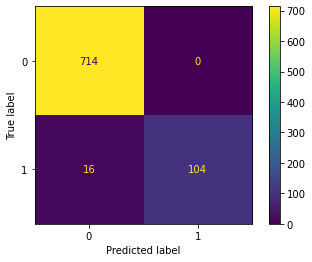

In [93]:
print_metrics(y_test, test_preds, gridxgb)

There has been no real change in our testing results, and we have seen no improvement in xgboosting. Overall the gradient boosting model has performed the best in overall performance and in cross validation score, as well as recall score, thus we will use that as our final model. 

# Final Model

Let's try one last grid search on the gradient boosting model to see if we can see any improvment in our model. 

In [94]:
#setup classifiers
gradboo = GradientBoostingClassifier(random_state=11)

#fit models
gradboo.fit(X_train_scaled, y_train)

#predict on our data in gradient
pred_train_grad = gradboo.predict(X_train_scaled)
pred_test_grad = gradboo.predict(X_test_scaled)

In [95]:
param_grid_gradboo = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'subsample': [0.4, 0.8, 1],
    'n_estimators': [25, 50, 100]
}

In [96]:
gridboo = GridSearchCV(gradboo, param_grid_gradboo, scoring='recall', cv=3, n_jobs=1)
gridboo.fit(X_train, y_train)

best_parameters = gridboo.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = gridxgb.predict(X_train)
test_preds = gridxgb.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.6}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.6}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
n_estimators: 100
subsample: 0.8

Training Accuracy: 97.9192%
Validation accuracy: 98.0815%


Precision Score: 1.0
Recall Score:    0.8667
Accuracy Score:  0.9808
F1 Score:        0.9286
Mean Cross Validation Score: 0.85


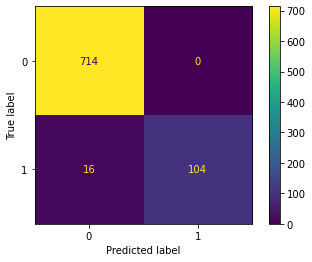

In [97]:
print_metrics(y_test, test_preds, gridboo)

While in the confusion matrix and in a single test, this has improved slightly, it falls short in the cross validation, thus it would be best to go with the base gradient boost model. While we might be able to improve it by looking further for the best parameters for the model, the gradient boost is performing quite well and will work excellently for its purpose.  

In [98]:
#setup classifiers
gradboo = GradientBoostingClassifier(random_state=11)

#fit models
gradboo.fit(X_train_scaled, y_train)

#predict on our data in gradient
pred_train_grad = gradboo.predict(X_train_scaled)
pred_test_grad = gradboo.predict(X_test_scaled)

Precision Score: 0.9811
Recall Score:    0.8667
Accuracy Score:  0.9784
F1 Score:        0.9204
Mean Cross Validation Score: 0.9772


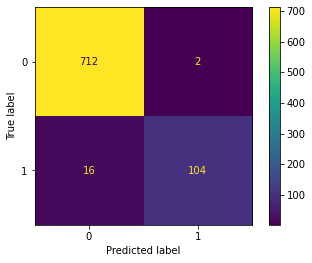

In [99]:
print_metrics(y_test, pred_test_grad, gradboo)

We are left with a very strong performing model that has accurately predicted most of our dependent values. We have weeded out all customers that will stay in our testing data, while getting 86.7% of customers that will churn, an accuracy of 97.8% and a cross validation score of 97.7%.

People can be tricky to get a prediction on and what will make them want to drop a company’s services. Being able to accurately predict churning customers 86.7% is a great model and we can be confident that most, if not all, customers that are predicted to churn, will churn. This can make a useful tool for the company to help keep customer retention higher, by trying to work with the predicted churning customers to find what we can do to keep their business.

Unfortunately we did miss some churning customers, even when we focused the model to try and recall as many churning customers as possible. This can be due to many factors and as stated above people can be tricky to predict. There are many factors that can effect people and many outside of the dataset that could cause the decision to influence people to drop our services. To understand what caused them to leave, we could reach out and see what the cause of their departure was. 
